## Project: Predicting Stock Prices using time series analysis
## Part 1: Data preparation, model estimation
**Source:** https://www.manning.com/liveprojectseries/time-series-for-stock-price-prediction-ser?new=true&experiment=C


### 1. Setting up environment

#### 1.1 Importing packages & setting-up parameters

In [1]:
import requests # to download data from api
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#turning on plot display in JN
%matplotlib inline 
# Setting pandas display options
pd.options.display.max_columns = 300
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 250

In [2]:
# PARAMETERS
API_KEY = '1MKCUS1FGWWGV3J4'
plt.style.use('fivethirtyeight')

In [13]:
def get_data_vantage(symbol, apikey, start_date = None, end_date = None):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol={symbol}&apikey={apikey}&datatype=csv'
    data = pd.read_csv(url)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    if start_date is not None and end_date is not None:
        data = data[(data['timestamp'] > start_date) & (data['timestamp'] <= end_date)]
        data["year"]=data["timestamp"].dt.year
        data["quarter"] = data["timestamp"].dt.quarter
        data["month"] = data["timestamp"].dt.month
        data["weekday"] = data["timestamp"].dt.weekday
        data["day"] = data["timestamp"].dt.dayofyear

    return data

In [14]:
# Downloading Verizon and AT&T full historic data
# Limiting to required dates - 01/01/2019 to 06/01/2021 
verizon_data = get_data_vantage(symbol = 'VZ', apikey = API_KEY, start_date = '2018-12-31', end_date = '2021-06-01')
att_data = get_data_vantage(symbol = 'T', apikey = API_KEY, start_date = '2018-12-31', end_date = '2021-06-01')

In [15]:
# Inspecting data
print(verizon_data.head())
print(verizon_data.info())
print(att_data.head())
print(att_data.info())

# All looks well


     timestamp   open   high    low  close    volume  year  quarter  month  \
553 2021-06-01  56.75  56.86  56.24  56.38  14922777  2021        2      6   
554 2021-05-28  56.35  56.64  56.29  56.49  14027803  2021        2      5   
555 2021-05-27  56.32  56.55  56.02  56.29  30754268  2021        2      5   
556 2021-05-26  56.47  56.56  56.27  56.36  14045237  2021        2      5   
557 2021-05-25  57.00  57.03  56.29  56.48  15935074  2021        2      5   

     weekday  day  
553        1  152  
554        4  148  
555        3  147  
556        2  146  
557        1  145  
<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 553 to 1160
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  608 non-null    datetime64[ns]
 1   open       608 non-null    float64       
 2   high       608 non-null    float64       
 3   low        608 non-null    float64       
 4   close      608 non-nu

In [16]:
verizon_data['quarter'].value_counts()
verizon_data['day'].value_counts()

day
15     3
91     3
113    3
112    3
42     3
      ..
321    1
328    1
332    1
335    1
18     1
Name: count, Length: 333, dtype: int64

In [44]:
# setting up plot style
from matplotlib import cycler
colors = cycler('color',
                ['royalblue', 'limegreen', 'tan',
                 'plum', 'papayawhip', 'tomato'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)



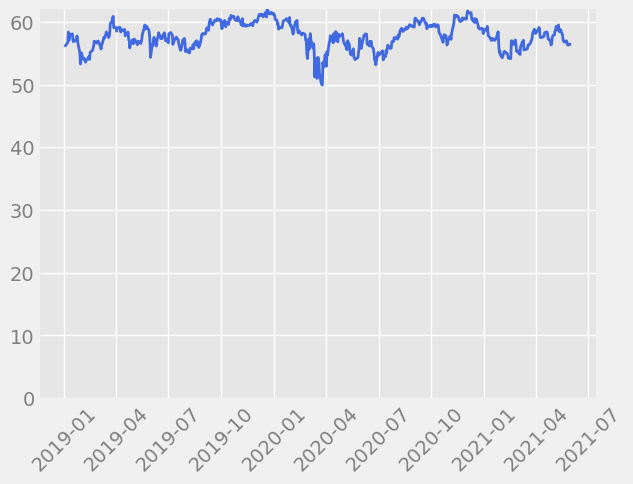

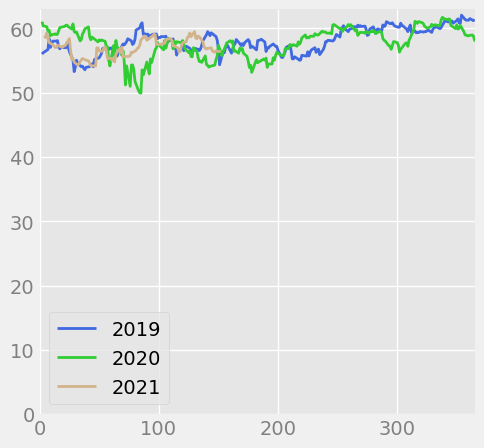

In [45]:
plt.plot(verizon_data['timestamp'], verizon_data['close'], label='Verizon')
plt.xticks(rotation=45)
plt.ylim((0, 62))
plt.show()
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(verizon_data[verizon_data['year'] == 2019]['day'], verizon_data[verizon_data['year'] == 2019]['close'], label='2019')
ax.plot(verizon_data[verizon_data['year'] == 2020]['day'], verizon_data[verizon_data['year'] == 2020]['close'], label='2020')
ax.plot(verizon_data[verizon_data['year'] == 2021]['day'], verizon_data[verizon_data['year'] == 2021]['close'], label='2021')
plt.xlim((0, 365))
plt.ylim((0, 63))
plt.legend()
plt.show()

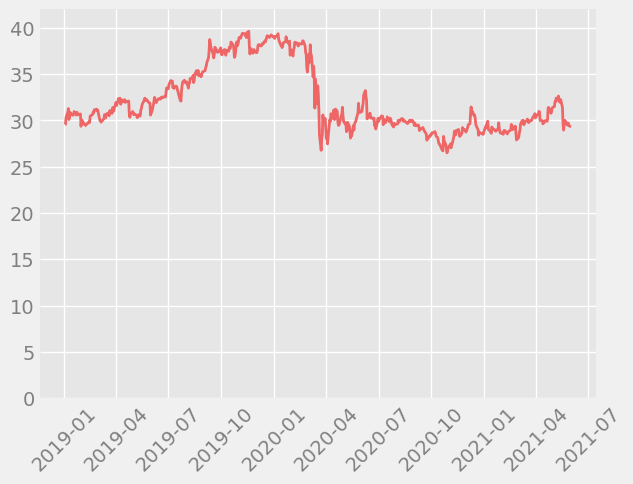

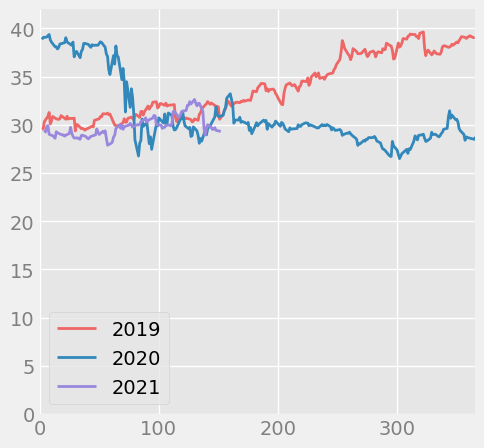

In [35]:
plt.plot(att_data['timestamp'], att_data['close'], label='AT&T')
plt.xticks(rotation=45)
plt.ylim((0, 42))
plt.show()
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(att_data[att_data['year'] == 2019]['day'], att_data[att_data['year'] == 2019]['close'], label='2019')
ax.plot(att_data[att_data['year'] == 2020]['day'], att_data[att_data['year'] == 2020]['close'], label='2020')
ax.plot(att_data[att_data['year'] == 2021]['day'], att_data[att_data['year'] == 2021]['close'], label='2021')
plt.xlim((0, 365))
plt.ylim((0, 42))
plt.legend()
plt.show()